# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import random

import thinkstats2
import thinkplot

## Multiple regression

Let's load up the NSFG data again.

In [2]:
import first

live, firsts, others = first.MakeFrames()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

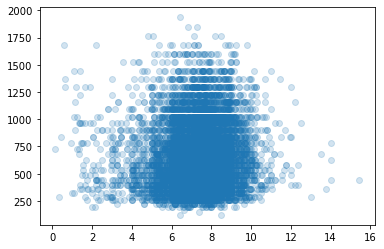

In [4]:
# checking relationship between agepreg & baby weight
# ThinkStats says later on that it is non-linear

plt.scatter(live.totalwgt_lb, live.agepreg.round(0)**2, alpha=0.2)

Here's birth weight as a function of mother's age (which we saw in the previous chapter).

In [5]:
import statsmodels.formula.api as smf

formula = 'totalwgt_lb ~ agepreg'
model = smf.ols(formula, data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.02
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           5.72e-11
Time:                        14:06:02   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9036   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8304      0.068    100.470      0.000       6.697       6.964
agepreg        0.0175      0.003      6.559      0.000       0.012       0.023
==============================================================================
Omnibus:                     1024.052   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3081.833
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can extract the parameters.

In [6]:
inter = results.params['Intercept']
slope = results.params['agepreg']
inter, slope

(6.830396973311056, 0.017453851471802884)

And the p-value of the slope estimate.

In [7]:
slope_pvalue = results.pvalues['agepreg']
slope_pvalue

5.722947107312932e-11

And the coefficient of determination.

In [8]:
results.rsquared

0.004738115474710369

The difference in birth weight between first babies and others.

In [9]:
diff_weight = firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
diff_weight

-0.12476118453549034

The difference in age between mothers of first babies and others.

In [10]:
diff_age = firsts.agepreg.mean() - others.agepreg.mean()
diff_age

-3.586434766150152

The age difference plausibly explains about half of the difference in weight.

In [11]:
slope * diff_age

-0.06259709972169486

Running a single regression with a categorical variable, `isfirst`:

In [12]:
live['isfirst'] = live.birthord == 1
formula = 'totalwgt_lb ~ isfirst'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     17.74
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           2.55e-05
Time:                        14:06:02   Log-Likelihood:                -15909.
No. Observations:                9038   AIC:                         3.182e+04
Df Residuals:                    9036   BIC:                         3.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3259      0.021    356.007      0.000       7.286       7.366
isfirst[T.True]    -0.1248      0.030     -4.212      0.000      -0.183      -0.067
==============================================================================
Omnibus:                      988.919   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.107
Skew:                          -0.589   Prob(JB):                         0.00
Kurtosis:                       5.511   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now finally running a multiple regression:

In [13]:
formula = 'totalwgt_lb ~ isfirst + agepreg'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     24.02
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.95e-11
Time:                        14:06:02   Log-Likelihood:                -15894.
No. Observations:                9038   AIC:                         3.179e+04
Df Residuals:                    9035   BIC:                         3.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9142      0.078     89.073      0.000       6.762       7.066
isfirst[T.True]    -0.0698      0.031     -2.236      0.025      -0.131      -0.009
agepreg             0.0154      0.003      5.499      0.000       0.010       0.021
==============================================================================
Omnibus:                     1019.945   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3063.682
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                       5.588   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, when we control for mother's age, the apparent difference due to `isfirst` is cut in half.

If we add age squared, we can control for a quadratic relationship between age and weight.

In [14]:
live['agepreg2'] = live.agepreg**2
formula = 'totalwgt_lb ~ isfirst + agepreg + agepreg2'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.64
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.35e-14
Time:                        14:06:02   Log-Likelihood:                -15884.
No. Observations:                9038   AIC:                         3.178e+04
Df Residuals:                    9034   BIC:                         3.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6923      0.286     19.937      0.000       5.133       6.252
isfirst[T.True]    -0.0504      0.031     -1.602      0.109      -0.112       0.011
agepreg             0.1124      0.022      5.113      0.000       0.069       0.155
agepreg2           -0.0018      0.000     -4.447      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1007.149   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3003.343
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                       5.562   Cond. No.                     1.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we do that, the apparent effect of `isfirst` gets even smaller, and is no longer statistically significant.

These results suggest that the apparent difference in weight between first babies and others might be explained by difference in mothers' ages, at least in part.

## Data Mining

We can use `join` to combine variables from the preganancy and respondent tables.

In [15]:
import nsfg

live = live[live.prglngth>30]
resp = nsfg.ReadFemResp()
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')

resp.sample(5, random_state=1)

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
caseid,,,,,,,,,,,,,,,,,,,,,
7088,7088,1,5,1,5,5.0,24,24,934,24,...,0,3409.549404,3941.313892,5544.246252,1,70,1228,1216,18:51:34,57.091333
8553,8553,1,5,3,5,5.0,27,27,899,27,...,0,4774.497063,5735.699848,9646.873574,1,12,1233,1221,11:51:12,46.464167
7399,7399,1,5,4,5,5.0,25,25,923,25,...,0,5941.116595,6316.844400,10624.300596,1,30,1231,1219,11:35:26,76.437275
2629,2629,1,5,1,5,1.0,19,19,997,19,...,0,1167.807749,1422.795802,2502.555536,2,44,1236,1224,15:46:35,75.877667
7136,7136,1,5,2,5,5.0,21,21,976,21,...,0,1556.871649,1944.430186,2735.229943,2,77,1235,1223,12:49:18,54.521000


In [16]:
join.sample(5, random_state=1)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,pubassis_i_r,basewgt_r,adj_mod_basewgt_r,finalwgt_r,secu_r,sest_r,cmintvw_r,cmlstyr,screentime,intvlngth
4482,4010,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,2974.769807,3600.484887,4680.990401,1,78,1234,1222,16:14:35,62.406333
6617,5992,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,1167.740473,1459.565889,1897.581612,2,65,1233,1221,21:38:11,117.113000
11209,10351,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,5962.861809,7146.376334,8025.380623,2,35,1231,1219,19:57:07,42.357667
13477,12456,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,3194.629816,6131.113163,11188.668410,1,62,1236,1224,18:46:35,104.362167
2276,2041,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,7423.288931,8033.330910,14660.025579,1,67,1230,1218,17:38:27,94.955167


And we can search for variables with explanatory power.

Because we don't clean most of the variables, we are probably missing some good ones.

In [17]:
import patsy

def GoMining(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula = 'totalwgt_lb ~ agepreg + ' + name
            
            # The following seems to be required in some environments
            # formula = formula.encode('ascii')

            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError):
            continue

        variables.append((results.rsquared, name))

    return variables

In [18]:
variables = GoMining(join)

The following functions report the variables with the highest values of $R^2$.

In [19]:
import re

def ReadVariables():
    """Reads Stata dictionary files for NSFG data.

    returns: DataFrame that maps variables names to descriptions
    """
    vars1 = thinkstats2.ReadStataDct('2002FemPreg.dct').variables
    vars2 = thinkstats2.ReadStataDct('2002FemResp.dct').variables

    all_vars = vars1.append(vars2)
    all_vars.index = all_vars.name
    return all_vars

def MiningReport(variables, n=30):
    """Prints variables with the highest R^2.

    t: list of (R^2, variable name) pairs
    n: number of pairs to print
    """
    all_vars = ReadVariables()

    variables.sort(reverse=True)
    for r2, name in variables[:n]:
        key = re.sub('_r$', '', name)
        try:
            desc = all_vars.loc[key].desc
            if isinstance(desc, pd.Series):
                desc = desc[0]
            print(name, r2, desc)
        except (KeyError, IndexError):
            print(name, r2)

Some of the variables that do well are not useful for prediction because they are not known ahead of time.

In [20]:
MiningReport(variables)

totalwgt_lb 1.0
birthwgt_lb 0.9498127305978009 BD-3 BIRTHWEIGHT IN POUNDS - 1ST BABY FROM THIS PREGNANCY
lbw1 0.3008240784470769 LOW BIRTHWEIGHT - BABY 1
prglngth 0.13012519488625063 DURATION OF COMPLETED PREGNANCY IN WEEKS
wksgest 0.12340041363361054 GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN WEEKS)
agecon 0.10203149928156052 AGE AT TIME OF CONCEPTION
mosgest 0.027144274639580024 GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN MONTHS)
babysex 0.01855092529394209 BD-2 SEX OF 1ST LIVEBORN BABY FROM THIS PREGNANCY
race_r 0.016199503586252995 RACE
race 0.016199503586252995 RACE
nbrnaliv 0.016017752709788002 BC-2 NUMBER OF BABIES BORN ALIVE FROM THIS PREGNANCY
paydu 0.014003795578114597 IB-10 CURRENT LIVING QUARTERS OWNED/RENTED, ETC
rmarout03 0.013430066465713209 INFORMAL MARITAL STATUS WHEN PREGNANCY ENDED - 3RD
birthwgt_oz 0.013102457615706053 BD-3 BIRTHWEIGHT IN OUNCES - 1ST BABY FROM THIS PREGNANCY
anynurse 0.012529022541810764 BH-1 WHETHER R BREASTFED THIS CHILD AT ALL - 1ST FROM TH

Combining the variables that seem to have the most explanatory power.

In [21]:
formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 + '
               'nbrnaliv>1 + paydu==1 + totincr')
results = smf.ols(formula, data=join).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     79.98
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          4.86e-113
Time:                        14:06:35   Log-Likelihood:                -14295.
No. Observations:                8781   AIC:                         2.861e+04
Df Residuals:                    8773   BIC:                         2.866e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.6303      0.065    102.223      0.000       6.503       6.757
C(race)[T.2]             0.3570      0.032     11.215      0.000       0.295       0.419
C(race)[T.3]             0.2665      0.051      5.175      0.000       0.166       0.367
babysex == 1[T.True]     0.2952      0.026     11.216      0.000       0.244       0.347
nbrnaliv > 1[T.True]    -1.3783      0.108    -12.771      0.000      -1.590      -1.167
paydu == 1[T.True]       0.1196      0.031      3.861      0.000       0.059       0.180
agepreg                  0.0074      0.003      2.921      0.004       0.002       0.012
totincr                  0.0122      0.004      3.110      0.002       0.005       0.020
==============================================================================
Omnibus:                      398.813   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.362
Skew:                          -0.037   Prob(JB):                    3.32e-302
Kurtosis:                       4.947   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic regression

Example: suppose we are trying to predict `y` using explanatory variables `x1` and `x2`.

In [22]:
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

According to the logit model the log odds for the $i$th element of $y$ is

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

So let's start with an arbitrary guess about the elements of $\beta$:



In [23]:
beta = [-1.5, 2.8, 1.1]

Plugging in the model, we get log odds.

In [24]:
log_o = beta[0] + beta[1] * x1 + beta[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Which we can convert to odds.

In [25]:
o = np.exp(log_o)
o

array([ 0.22313016,  0.67032005,  0.67032005, 11.02317638])

And then convert to probabilities.

In [26]:
p = o / (o+1)
p

array([0.18242552, 0.40131234, 0.40131234, 0.9168273 ])

The likelihoods of the actual outcomes are $p$ where $y$ is 1 and $1-p$ where $y$ is 0. 

In [27]:
likes = np.where(y, p, 1-p)
likes

array([0.81757448, 0.40131234, 0.59868766, 0.9168273 ])

The likelihood of $y$ given $\beta$ is the product of `likes`:

In [28]:
like = np.prod(likes)
like

0.1800933529673034

Logistic regression works by searching for the values in $\beta$ that maximize `like`.

Here's an example using variables in the NSFG respondent file to predict whether a baby will be a boy or a girl.

In [29]:
import first
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]
live['boy'] = (live.babysex==1).astype(int)

The mother's age seems to have a small effect.

In [30]:
model = smf.logit('boy ~ agepreg', data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8882
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Jan 2021   Pseudo R-squ.:               6.144e-06
Time:                        14:06:37   Log-Likelihood:                -6156.7
converged:                       True   LL-Null:                       -6156.8
Covariance Type:            nonrobust   LLR p-value:                    0.7833
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0058      0.098      0.059      0.953      -0.185       0.197
agepreg        0.0010      0.004      0.275      0.783      -0.006       0.009
==============================================================================
"""

Here are the variables that seemed most promising.

In [31]:
formula = 'boy ~ agepreg + hpagelb + birthord + C(race)'
model = smf.logit(formula, data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.692944
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8782
Model:                          Logit   Df Residuals:                     8776
Method:                           MLE   Df Model:                            5
Date:                Sat, 02 Jan 2021   Pseudo R-squ.:               0.0001440
Time:                        14:06:37   Log-Likelihood:                -6085.4
converged:                       True   LL-Null:                       -6086.3
Covariance Type:            nonrobust   LLR p-value:                    0.8822
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0301      0.104     -0.290      0.772      -0.234       0.173
C(race)[T.2]    -0.0224      0.051     -0.439      0.660      -0.122       0.077
C(race)[T.3]    -0.0005      0.083     -0.005      0.996      -0.163       0.162
agepreg         -0.0027      0.006     -0.484      0.629      -0.014       0.008
hpagelb          0.0047      0.004      1.112      0.266      -0.004       0.013
birthord         0.0050      0.022      0.227      0.821      -0.038       0.048
================================================================================
"""

In [32]:
model.exog_names

['Intercept', 'C(race)[T.2]', 'C(race)[T.3]', 'agepreg', 'hpagelb', 'birthord']

To make a prediction, we have to extract the exogenous and endogenous variables.

In [33]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

In [34]:
endog.sample(5)

,boy
6658,0.0
5178,1.0
4704,1.0
2759,0.0
3388,0.0


In [35]:
exog.sample(5)

,Intercept,C(race)[T.2],C(race)[T.3],agepreg,hpagelb,birthord
226,1.0,1.0,0.0,26.08,26.0,2.0
6893,1.0,1.0,0.0,28.16,30.0,3.0
8056,1.0,0.0,0.0,23.16,25.0,1.0
1596,1.0,0.0,0.0,19.75,22.0,1.0
6073,1.0,0.0,0.0,21.91,18.0,3.0


The baseline prediction strategy is to guess "boy".  In that case, we're right almost 51% of the time.

In [36]:
actual = endog['boy']
baseline = actual.mean()
baseline

0.507173764518333

If we use the previous model, we can compute the number of predictions we get right.

In [37]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(3944.0, 548.0)

And the accuracy, which is slightly higher than the baseline.

In [38]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.5115007970849464

To make a prediction for an individual, we have to get their information into a `DataFrame`.

In [39]:
columns = ['agepreg', 'hpagelb', 'birthord', 'race']
new = pd.DataFrame([[35, 39, 3, 2]], columns=columns)
y = results.predict(new)
y

0    0.513091
dtype: float64

This person has a 51% chance of having a boy (according to the model).

## Exercises

**Exercise:** Suppose one of your co-workers is expecting a baby and you are participating in an office pool to predict the date of birth. Assuming that bets are placed during the 30th week of pregnancy, what variables could you use to make the best prediction? You should limit yourself to variables that are known before the birth, and likely to be available to the people in the pool.

In [40]:
import first
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]

The following are the only variables I found that have a statistically significant effect on pregnancy length.

In [41]:
import statsmodels.formula.api as smf
model = smf.ols('prglngth ~ birthord==1 + race==2 + nbrnaliv>1', data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prglngth   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.28
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           5.09e-22
Time:                        14:06:39   Log-Likelihood:                -18247.
No. Observations:                8884   AIC:                         3.650e+04
Df Residuals:                    8880   BIC:                         3.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                38.7617      0.039   1006.410      0.000      38.686      38.837
birthord == 1[T.True]     0.1015      0.040      2.528      0.011       0.023       0.180
race == 2[T.True]         0.1390      0.042      3.311      0.001       0.057       0.221
nbrnaliv > 1[T.True]     -1.4944      0.164     -9.086      0.000      -1.817      -1.172
==============================================================================
Omnibus:                     1587.470   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6160.751
Skew:                          -0.852   Prob(JB):                         0.00
Kurtosis:                       6.707   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** The Trivers-Willard hypothesis suggests that for many mammals the sex ratio depends on “maternal condition”; that is, factors like the mother’s age, size, health, and social status. See https://en.wikipedia.org/wiki/Trivers-Willard_hypothesis

Some studies have shown this effect among humans, but results are mixed. In this chapter we tested some variables related to these factors, but didn’t find any with a statistically significant effect on sex ratio.

As an exercise, use a data mining approach to test the other variables in the pregnancy and respondent files. Can you find any factors with a substantial effect?

In [42]:
import regression
join = regression.JoinFemResp(live)

In [43]:
# Solution goes here

In [44]:
# Solution goes here

In [45]:
# Solution goes here

**Exercise:** If the quantity you want to predict is a count, you can use Poisson regression, which is implemented in StatsModels with a function called `poisson`. It works the same way as `ols` and `logit`. As an exercise, let’s use it to predict how many children a woman has born; in the NSFG dataset, this variable is called `numbabes`.

Suppose you meet a woman who is 35 years old, black, and a college graduate whose annual household income exceeds $75,000. How many children would you predict she has born?

In [46]:
# Solution goes here

In [47]:
# Solution goes here

Now we can predict the number of children for a woman who is 35 years old, black, and a college
graduate whose annual household income exceeds $75,000

In [48]:
# Solution goes here

**Exercise:** If the quantity you want to predict is categorical, you can use multinomial logistic regression, which is implemented in StatsModels with a function called `mnlogit`. As an exercise, let’s use it to guess whether a woman is married, cohabitating, widowed, divorced, separated, or never married; in the NSFG dataset, marital status is encoded in a variable called `rmarital`.

Suppose you meet a woman who is 25 years old, white, and a high school graduate whose annual household income is about $45,000. What is the probability that she is married, cohabitating, etc?

In [49]:
# Solution goes here

Make a prediction for a woman who is 25 years old, white, and a high
school graduate whose annual household income is about $45,000.

In [50]:
# Solution goes here